In [4]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import taccjm.taccjm_client as tjm
from IPython.display import Image

import pyadcirc.io as pyio
import pyadcirc.viz.figuregen as fg

%matplotlib widget

In [9]:
jm = "l1"
system = "ls6"
if jm not in [j["jm_id"] for j in tjm.list_jms()]:
    tjm.init_jm(jm, system)
tjm.list_jms()

[{'jm_id': 'f1',
  'sys': 'frontera.tacc.utexas.edu',
  'user': 'clos21',
  'apps_dir': '/scratch1/06307/clos21/f1/apps',
  'jobs_dir': '/scratch1/06307/clos21/f1/jobs'},
 {'jm_id': 'l1',
  'sys': 'ls6.tacc.utexas.edu',
  'user': 'clos21',
  'apps_dir': '/scratch/06307/clos21/l1/apps',
  'jobs_dir': '/scratch/06307/clos21/l1/jobs'}]

In [11]:
# Dir with this notebook resides
base_dir = Path(os.path.dirname(os.getcwd()))
data_dir = base_dir / "notebooks" / "data"
data_dir.mkdir(exist_ok=True)
base_dir, data_dir

(PosixPath('/home/jovyan/work/repos/pyadcirc'),
 PosixPath('/home/jovyan/work/repos/pyadcirc/notebooks/data'))

# Set-Up Choosing ADCIRC Data 

* Publicly accessible data is available for users to access at `/work/06307/clos21/pub/adcirc`.

* Directories `inputs` and `execs` contain input data/configuration files for ADCIRC runs and executables to run them.

* README docs within directories contain more info on how executables/inputs.

* Run only one subsection below to load data for visualization in the rest of the notebook.

In [12]:
# Pub dir paths on TACC. Should be accessible from all systems
pub_dir = Path("/work2/06307/clos21/pub")
adc_inputs = pub_dir / "adcirc" / "inputs"
adc_execs = pub_dir / "adcirc" / "execs"

tjm.list_files(jm, adc_inputs), tjm.list_files(jm, adc_execs)

([{'filename': 'Alaska'},
  {'filename': 'Texas'},
  {'filename': 'ShinnecockInlet'}],
 [{'filename': 'ls6'}, {'filename': 'stampede2'}])

## Choosing Data and Downloading

### SI Inlet Data

SI inlet runs

In [16]:
si_path = data_dir / "si-mud"
print(si_path)

/Users/carlos/repos/pyadcirc/notebooks/data/si-mud


### Alaska Data

In [2]:
ak_path = adc_inputs / "Alaska"

tjm.list_files(jm, ak_path / "mesh" / "test")

NameError: name 'adc_inputs' is not defined

In [6]:
tacc_f14_file = str(ak_path / "mesh" / "test" / "fort.14")

# Firs two lines of mesh file give us name and num elements/nodes
print(tjm.peak_file(jm, tacc_f14_file, head=2))

OceanMesh2D  
27757 15876 



## Downloaded Data

#### Grid - Fort.14

In [17]:
local_f14 = data_dir / "fort.14"
# tjm.download(jm, tacc_f14_file, local_path=str(local_f14))
tjm.download(jm, "/work/06307/clos21/pub/adcirc/inputs/ShinnecockInlet/nodal/GD-WindMult_WindJan2018_CFSv2_12", local_path=str(si_path))

In [13]:
str(data_dir)
os.system(f"ls -lt {data_dir} | head -n 10")

total 5688
drwxr-xr-x   2 carlos  staff       64 Feb  7 13:07 fg_temp
-rw-r--r--   1 carlos  staff       55 Feb  7 13:07 ps2raster_34c.bb
-rw-r--r--   1 carlos  staff     7417 Feb  7 13:05 mesh.inp
-rw-r--r--   1 carlos  staff      126 Feb  7 13:05 TopoBlueGreen.pal
-rw-r--r--   1 carlos  staff   189089 Feb  7 13:01 bathymetry0001.jpg
-rw-r--r--   1 carlos  staff      141 Feb  7 13:01 TopoBlueGreen.txt
-rw-r--r--   1 carlos  staff   534392 Feb  7 11:24 mesh0001.jpg
-rw-r--r--   1 carlos  staff  1741564 Feb  7 10:28 fort.14
drwx------  14 carlos  staff      448 Feb  4 19:25 def


0

# Inputs

Main inputs for ADCIRC runs:

* fort.14 - Grid (triangular mesh) and bathymetry at each node.

* fort.15 - Control file - most run parameters contained here.
* fort.13 - Nodal attributes files.
* Other files - Supporting files for tidal forcing, for example.

Of these, we can graph fort.14 grids and fort.13 nodal attributes at each grid point (in the case that they may vary spatially).

## Grids - Fort.14

In [27]:
# si_path = data_dir / "si"
# local_f14 = si_path / "fort.14"
local_f14 = "/Users/carlos/repos/pyadcirc/notebooks/data/si-mud/GD-WindMult_WindJan2018_CFSv2_12/fort.14"
Path(local_f14).exists()

True

In [21]:
# data = io.pro(str(local_f14))
data =pyio.(str(si_path))

SyntaxError: invalid syntax (1510375856.py, line 2)

### Triangular Mesh Plot

Just view the triangular mesh

In [28]:
res = fg.mesh_plot(
    str(local_f14),
    output_name="si-inlet-mesh",
    title="Shinnecock Inlet Mesh",
    boundary_color="Tan",
)

In [8]:
res

{'confing_path': PosixPath('/Users/carlos/repos/pyadcirc/notebooks/data/si/mesh.inp'),
 'image_path': PosixPath('/Users/carlos/repos/pyadcirc/notebooks/data/si/si-inlet-mesh0001.jpg'),
 'fg_config': {'output_filename': 'si-inlet-mesh',
  'f14_file': 'fort.14',
  'boundaries': (1, 'Tan'),
  'plot_grid': True,
  'west_bound': -73.01325162483,
  'east_bound': -71.94335392167,
  'south_bound': 40.323888346900006,
  'north_bound': 41.0508083629,
  'border_box_spacing': 0.0,
  'border_annotation_spacing': 0.0,
  'title': (1, 'Shinnecock Inlet Mesh')},
 'docker': {'cmd': 'bash -c "cd /mnt/data && figuregen -I mesh.inp"',
  'vols': {PosixPath('/Users/carlos/repos/pyadcirc/notebooks/data/si'): {'bind': '/mnt/data',
    'mode': 'rw'}},
  'res': " \n--------------------------------------\nFigureGen 51                2012/10/08\n \nThis program reads raw ADCIRC files\nand uses GMT to generate a figure with\ncontours and vectors plotted within a\nspecified lat/lon box.\n----------------------------

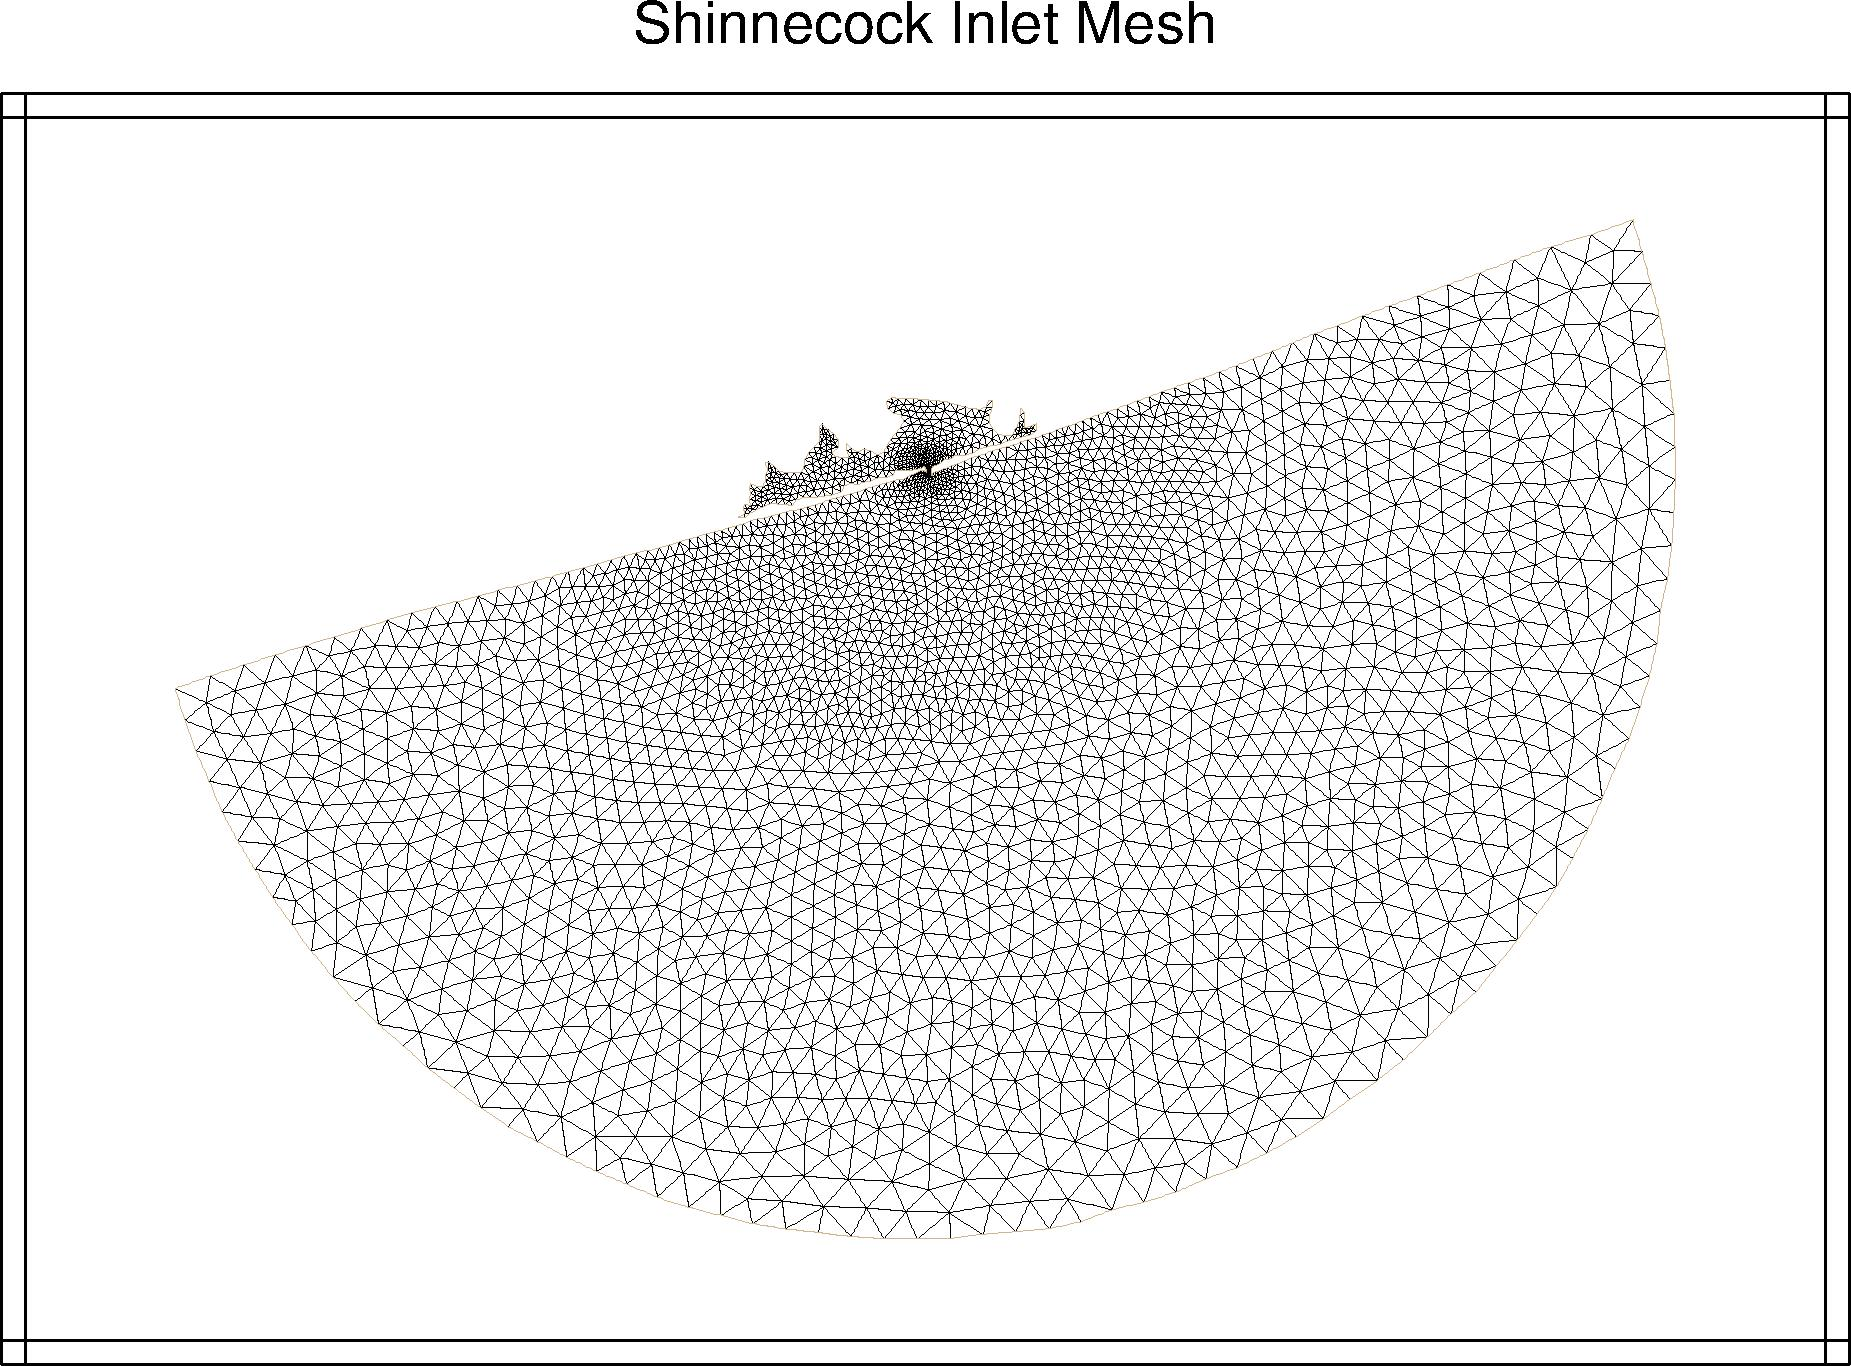

In [29]:
Image(filename=res["image_path"], width=1200)

### Zoom in on a region


In [110]:
nome_region = [360 - 172.7, 360 - 159.25, 61.35, 67.4]

In [31]:
res = fg.mesh_plot(
    str(local_f14),
    output_name="nome_test_mesh",
    title="Nome and Surrounding Region Mesh",
    boundary_color="Tan",
    bounding_box=nome_region,
)

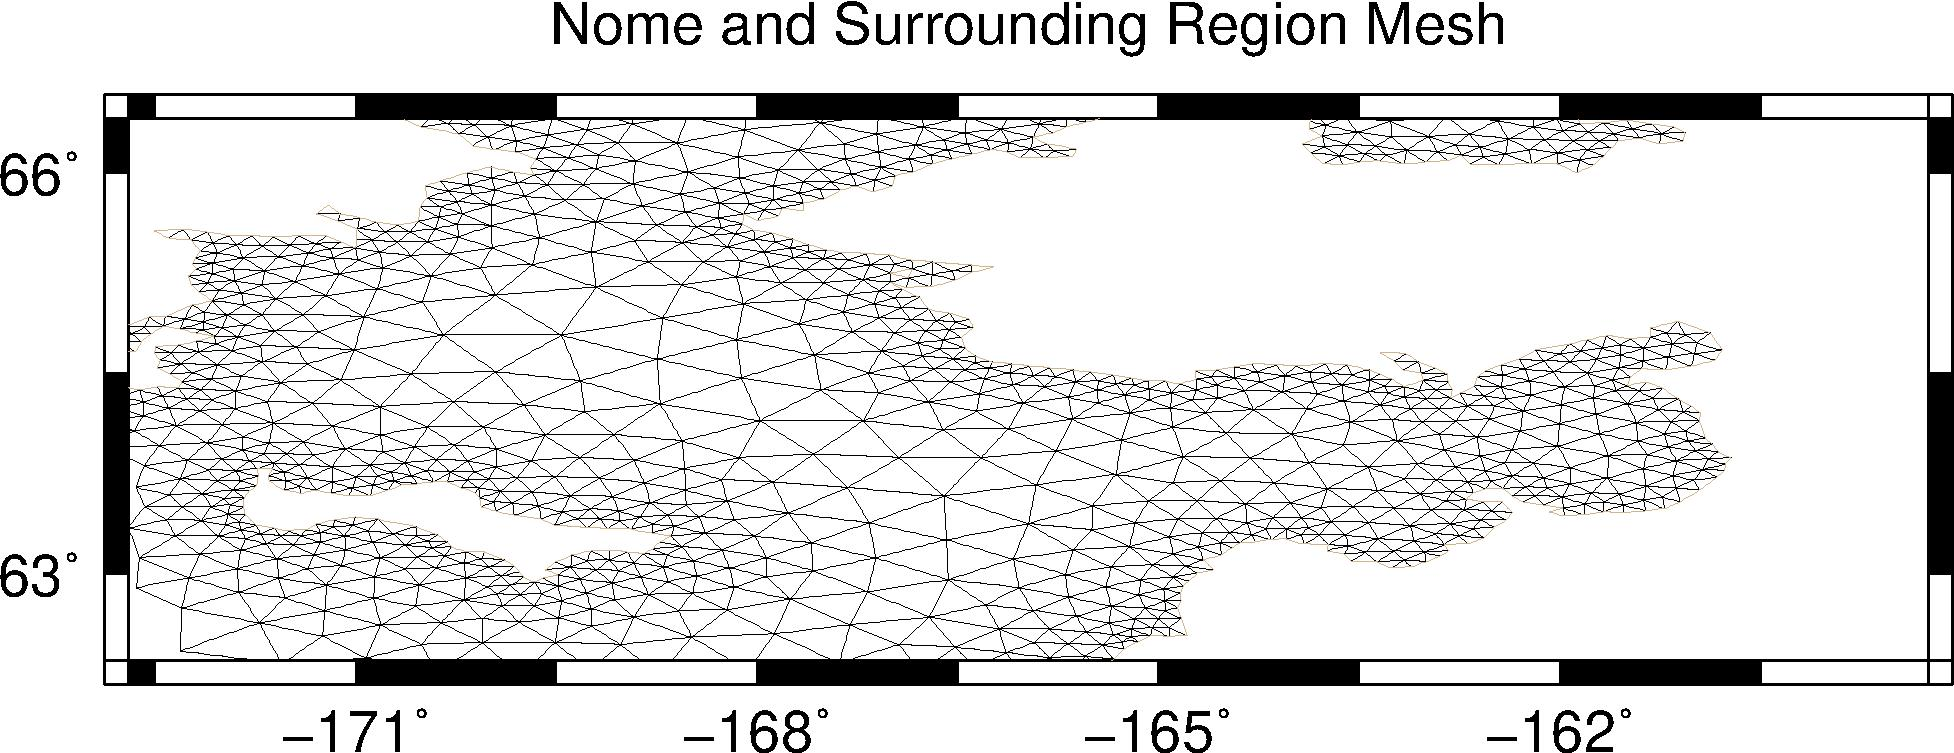

In [30]:
Image(filename=res["image_path"], width=1200)

## Bathymetry Plot

Text(0.5, 0.98, 'Histogram of All bathymetry values (left) and <100m (right)')

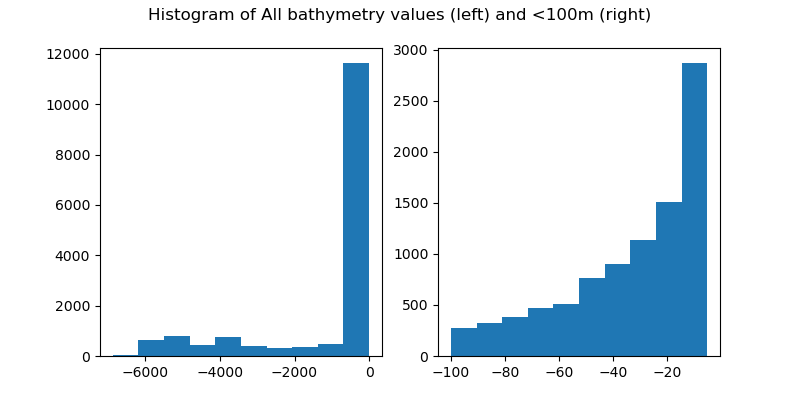

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
grid = au.read_fort14(str(data_dir / "fort.14"))
_ = ax[0].hist(-1 * grid["DP"])
_ = ax[1].hist(-1 * grid["DP"][grid["DP"] < 100])
fig.suptitle("Histogram of All bathymetry values (left) and <100m (right)")

In [97]:
intervals = (
    list(np.arange(-6000, 0, 3000))
    + list(np.arange(-500, -100, 250))
    + list(np.arange(-100, -10, 10))
    + list(np.arange(-10, 1, 1))
)
intervals = [(x, 0) if x != 0.0 else (x, 1) for x in intervals]
intervals

[(-6000, 0),
 (-3000, 0),
 (-500, 0),
 (-250, 0),
 (-100, 0),
 (-90, 0),
 (-80, 0),
 (-70, 0),
 (-60, 0),
 (-50, 0),
 (-40, 0),
 (-30, 0),
 (-20, 0),
 (-10, 0),
 (-9, 0),
 (-8, 0),
 (-7, 0),
 (-6, 0),
 (-5, 0),
 (-4, 0),
 (-3, 0),
 (-2, 0),
 (-1, 0),
 (0, 1)]

In [98]:
res = fg.bathymetry_plot(
    str(local_f14),
    output_name="AK_Bathymetry",
    title="Alaska Test Mesh - Bathymetry",
    intervals=intervals,
)

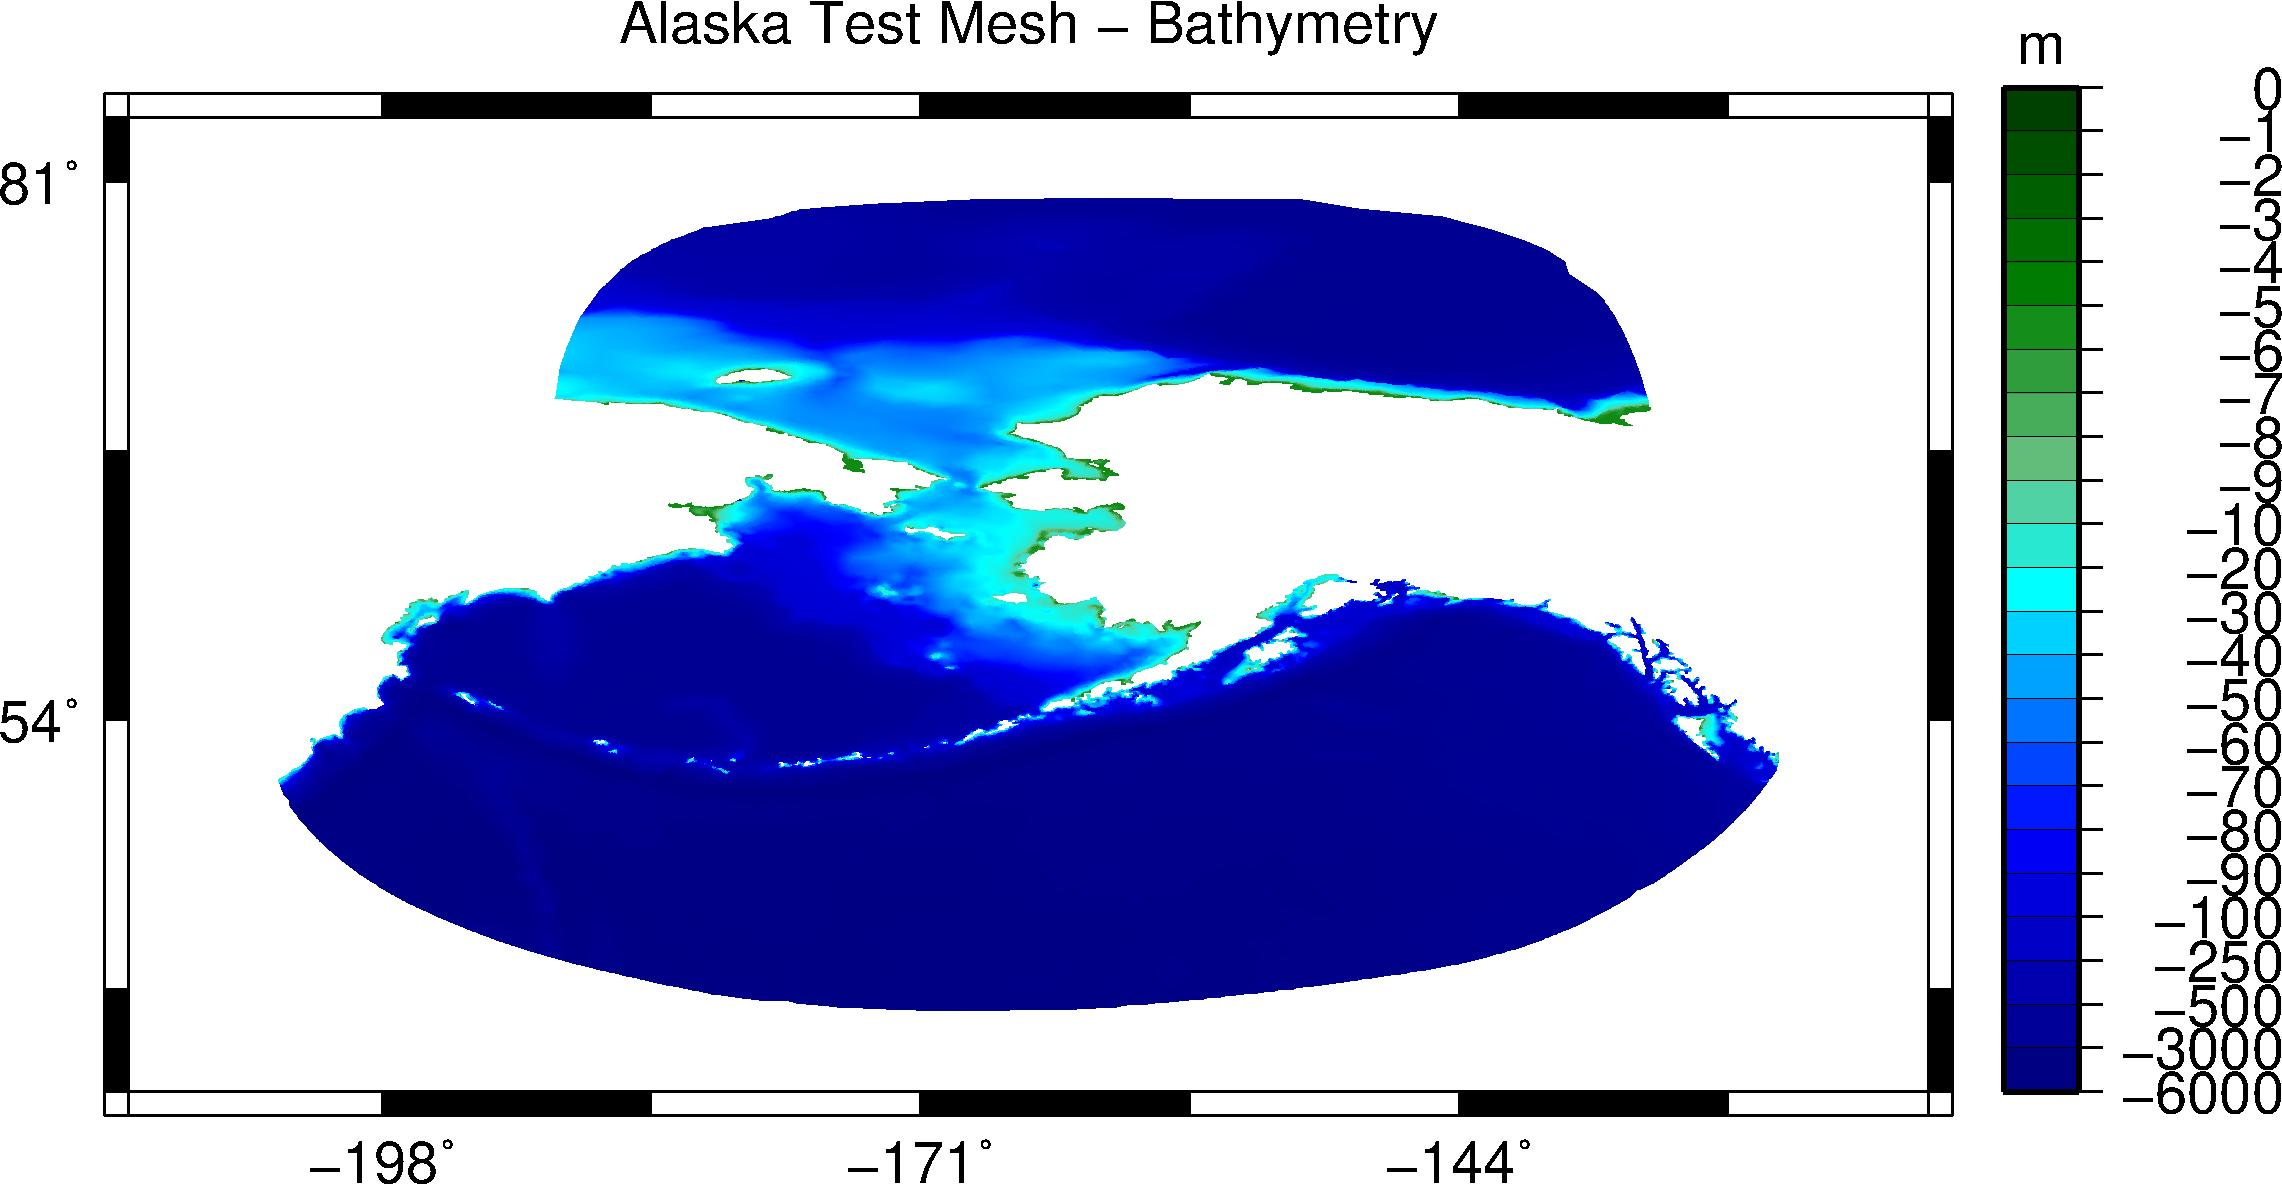

In [99]:
Image(filename=res["image_path"], width=1200)

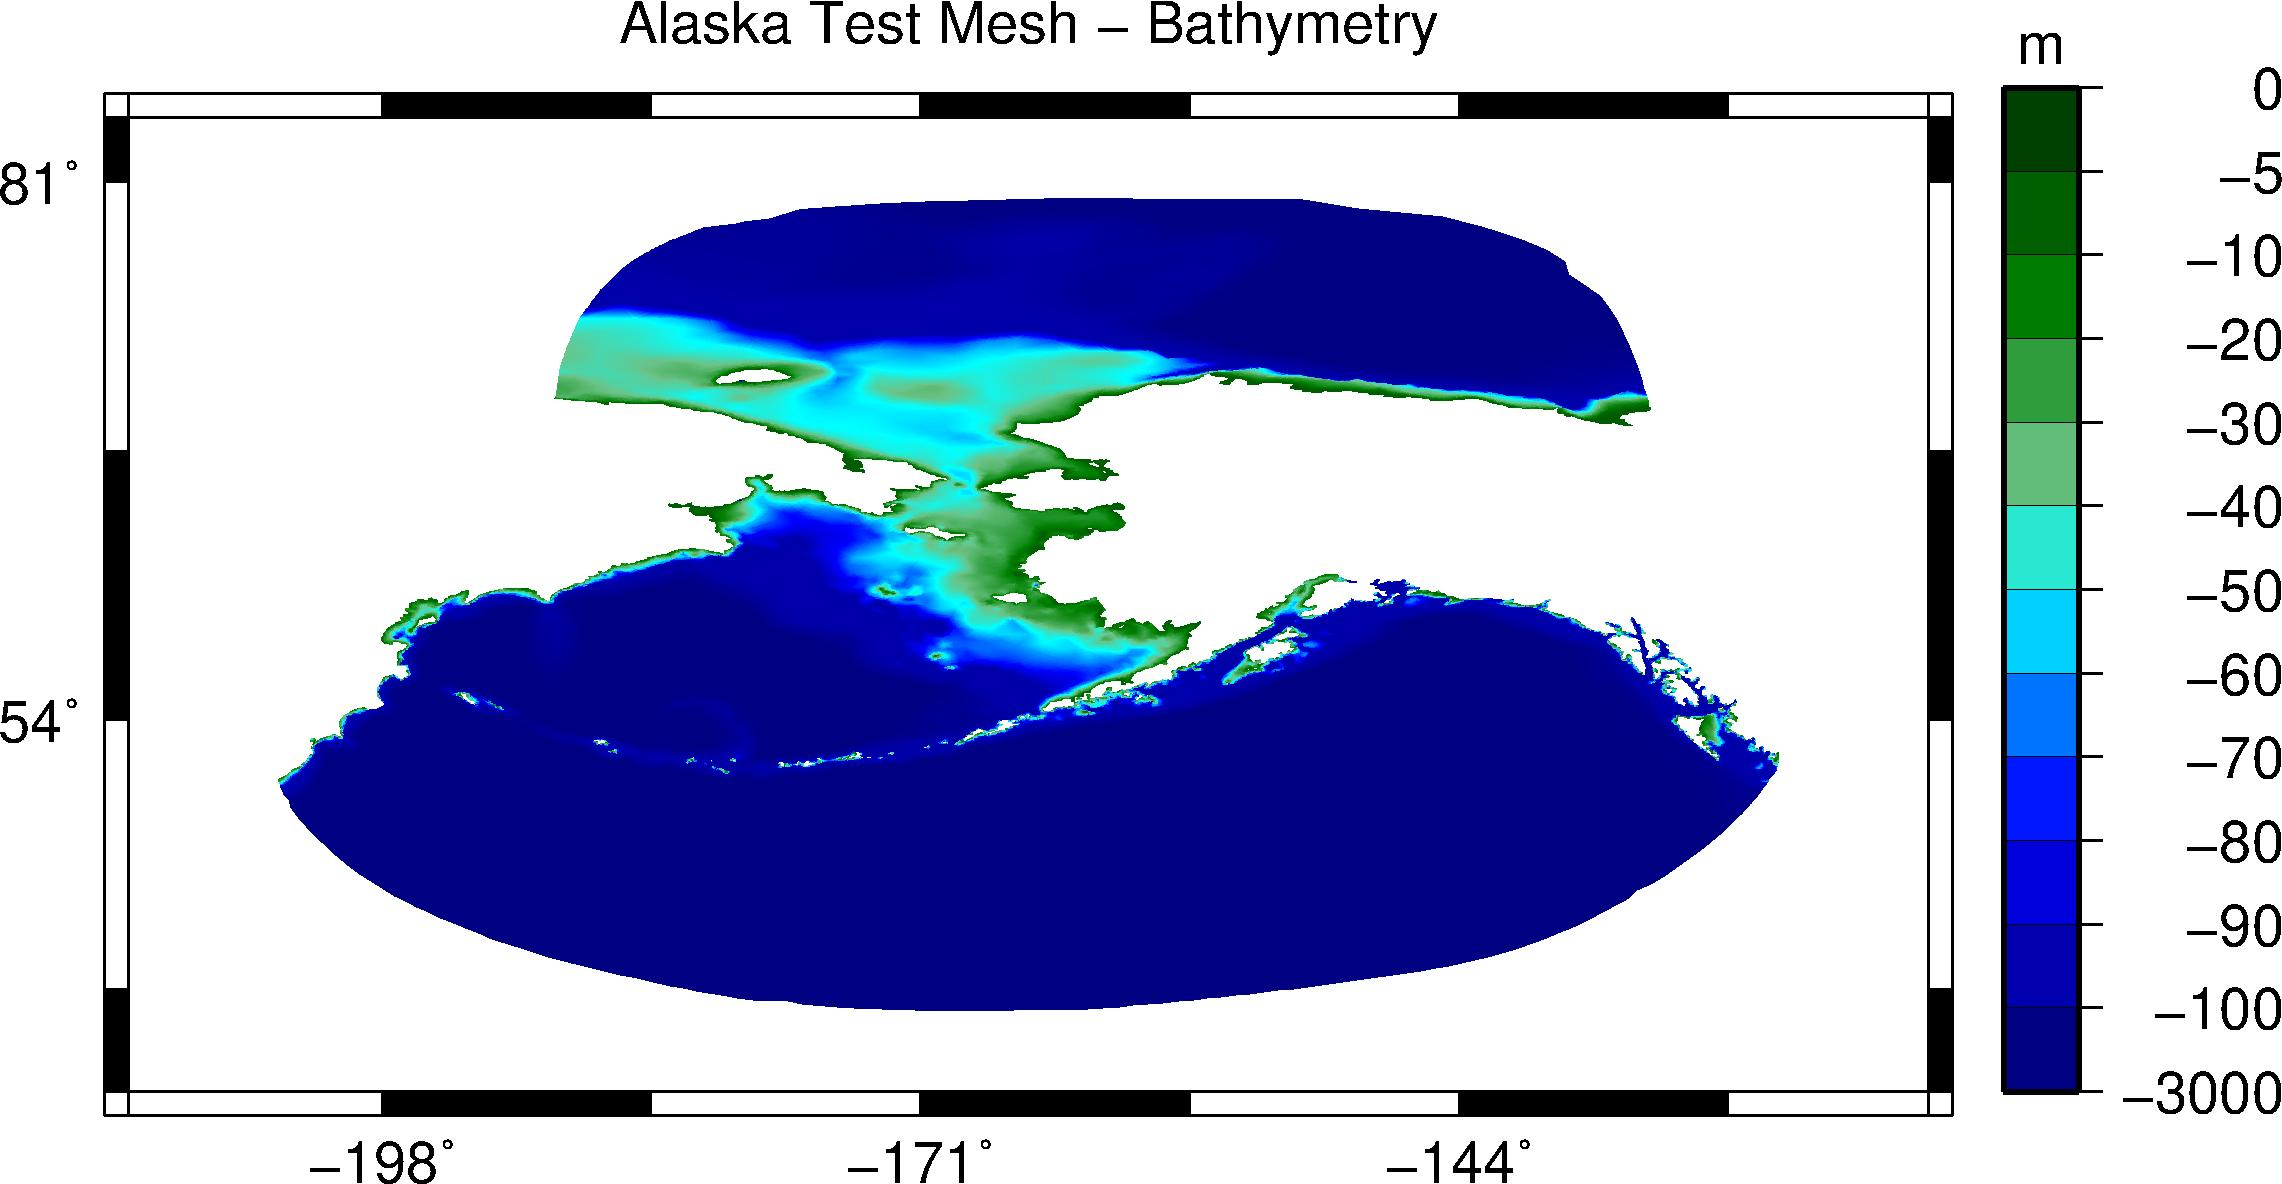

In [75]:
Image(filename=res["image_path"], width=1200)

In [107]:
intervals = (
    list(np.arange(-500, -100, 100))
    + list(np.arange(-100, -10, 25))
    + list(np.arange(-10, 1, 1))
)
intervals = [(x, 0) if x != 0.0 else (x, 1) for x in intervals]
intervals

[(-500, 0),
 (-400, 0),
 (-300, 0),
 (-200, 0),
 (-100, 0),
 (-75, 0),
 (-50, 0),
 (-25, 0),
 (-10, 0),
 (-9, 0),
 (-8, 0),
 (-7, 0),
 (-6, 0),
 (-5, 0),
 (-4, 0),
 (-3, 0),
 (-2, 0),
 (-1, 0),
 (0, 1)]

In [112]:
res = fg.bathymetry_plot(
    str(local_f14),
    output_name="AK_Bathymetry",
    title="Nome Area - Bathymetry",
    intervals=intervals,
    bounding_box=nome_region,
)

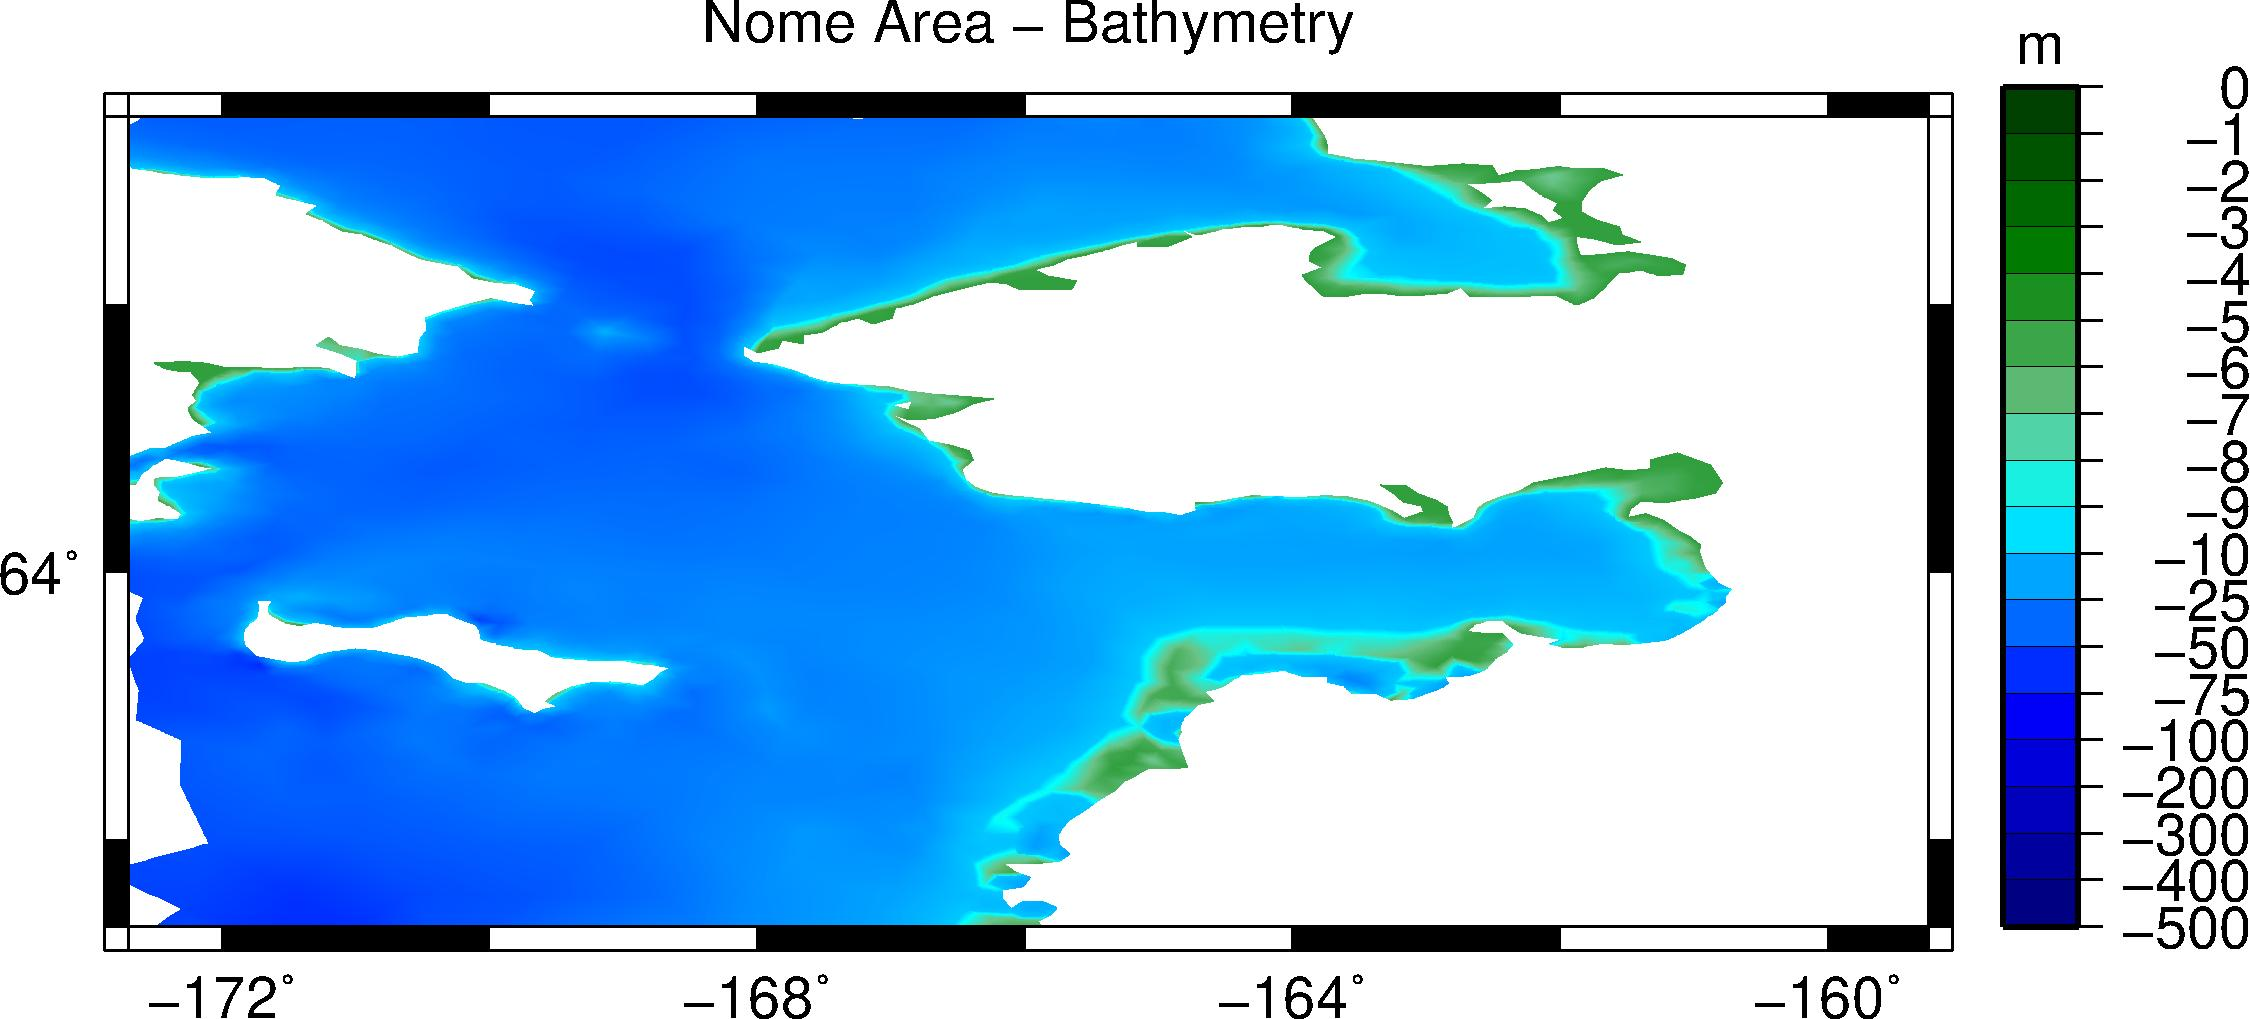

In [113]:
Image(filename=res["image_path"], width=1200)

## Nodal Attributes - Fort.13

TODO: Add section on plotting fort.13 files using python and FG.

## Grid Decompositions - partmesh.txt

We can also ...

## Meteorological Forcing Files - fort.22*

###  Load Data


In [16]:
data = xr.open_dataset(str(ds_path / "fort.221.nc"))
data

<xarray.Dataset>
Dimensions:    (time: 168, latitude: 81, longitude: 201)
Coordinates:
  * time       (time) datetime64[ns] 2016-12-15 ... 2017-01-25T18:00:00
  * latitude   (latitude) float64 80.0 79.5 79.0 78.5 ... 41.5 41.0 40.5 40.0
  * longitude  (longitude) float64 140.0 140.5 141.0 141.5 ... 239.0 239.5 240.0
Data variables:
    prmsl      (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    history:                 2022-02-17T23:32 GRIB to CDM+CF via cfgrib-0.9.1...

In [17]:
min_press = data["prmsl"].min()
max_press = data["prmsl"].max()
vmin = int(min_press / 1000) * 1000
vmax = int(max_press / 1000) * 1000 + 1000
vmin, vmax

(94000, 106000)

In [18]:
long_range = [160, 230]
lat_range = [40, 80]

### Fort.221 - Pressure

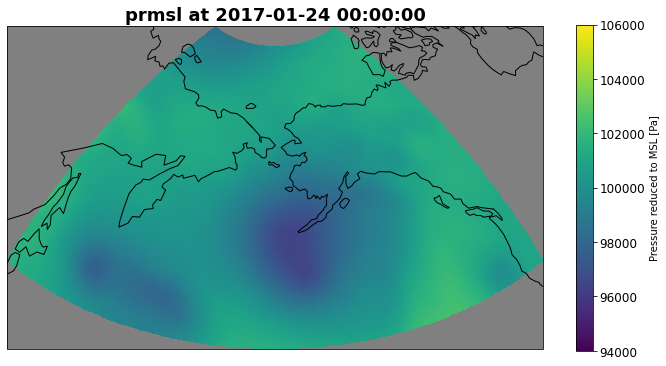

In [10]:
plt.figure(figsize=(12, 6))
viz.pyplot_mesh(
    data,
    "prmsl",
    projection=crs.Orthographic(-170, 45),
    timestep=160,
    vrange=[vmin, vmax],
    features=[("coastlines", {"resolution": "110m", "color": "black"})],
)

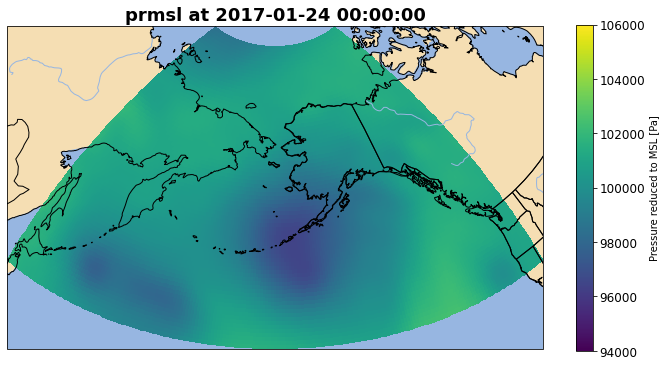

In [12]:
plt.figure(figsize=(12, 6))
viz.pyplot_mesh(
    data,
    "prmsl",
    projection=crs.Orthographic(-170, 45),
    timestep=160,
    vrange=[vmin, vmax]
)

### Create a gif from saved images

In [34]:
gif_images_path = ds_path / "gif_images"
gif_images_path.mkdir(exist_ok=True)
gif_path = ds_path / "test.gif"
gif_images_path, gif_path

(PosixPath('/Users/carlos/repos/pyadcirc/notebooks/data/ncar/Feb2011/gif_images'),
 PosixPath('/Users/carlos/repos/pyadcirc/notebooks/data/ncar/Feb2011/test.gif'))

In [19]:
from typing import AnyStr, Callable, List, Tuple
from pathlib import Path

def gen_image(step: int, path: str):
    viz.pyplot_mesh(
        data,
        "prmsl",
        timestep=step,
        save_path=path,
        projection=crs.PlateCarree(central_longitude=-170),
        vrange=[vmin, vmax],
        features=[("coastlines", {"resolution": "50m", "color": "black"})],
    )

def generate_gif(name:str, gen_image: Callable, steps: List=None, figsize: Tuple=(12,6), build_dir: str=None):

    build_dir = Path.cwd() if build_dir is None else Path(build_dir)

    gif_images_path = build_dir / ".gif_images"
    gif_images_path.mkdir(exist_ok=True)
    gif_path = build_dir / name

    images = []
    if steps is None:
        steps = range(len(data["time"]))
    for t in steps:
        plt.figure(figsize=(12, 6))
        filename = str(gif_images_path / f"{t}.png")
        gen_image(t, filename)
        plt.close()
        images.append(filename)

    with iio.get_writer(str(gif_path), mode="I") as writer:
        for i in images:
            writer.append_data(iio.imread(i))

    optimize(gif_path)

    for i in images:
        Path(i).unlink()



generate_gif('test.gif', gen_image, steps=range(25))

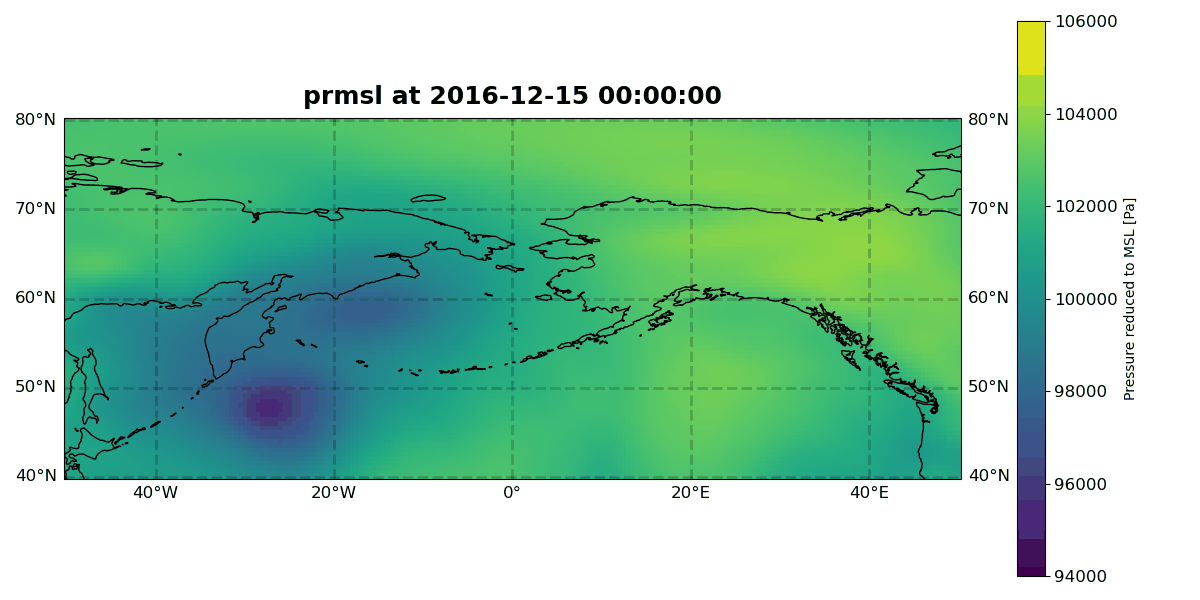

In [23]:
Image(filename=str(ds_path / "optimized.gif"))

In [ ]:
"/scratch/06307/clos21/l1/jobs/test-ak_lw_feb2019_20220207_172358"

# Outputs

ADCIRC runs produce varying amount of outputs. We can categorize these into the following groups